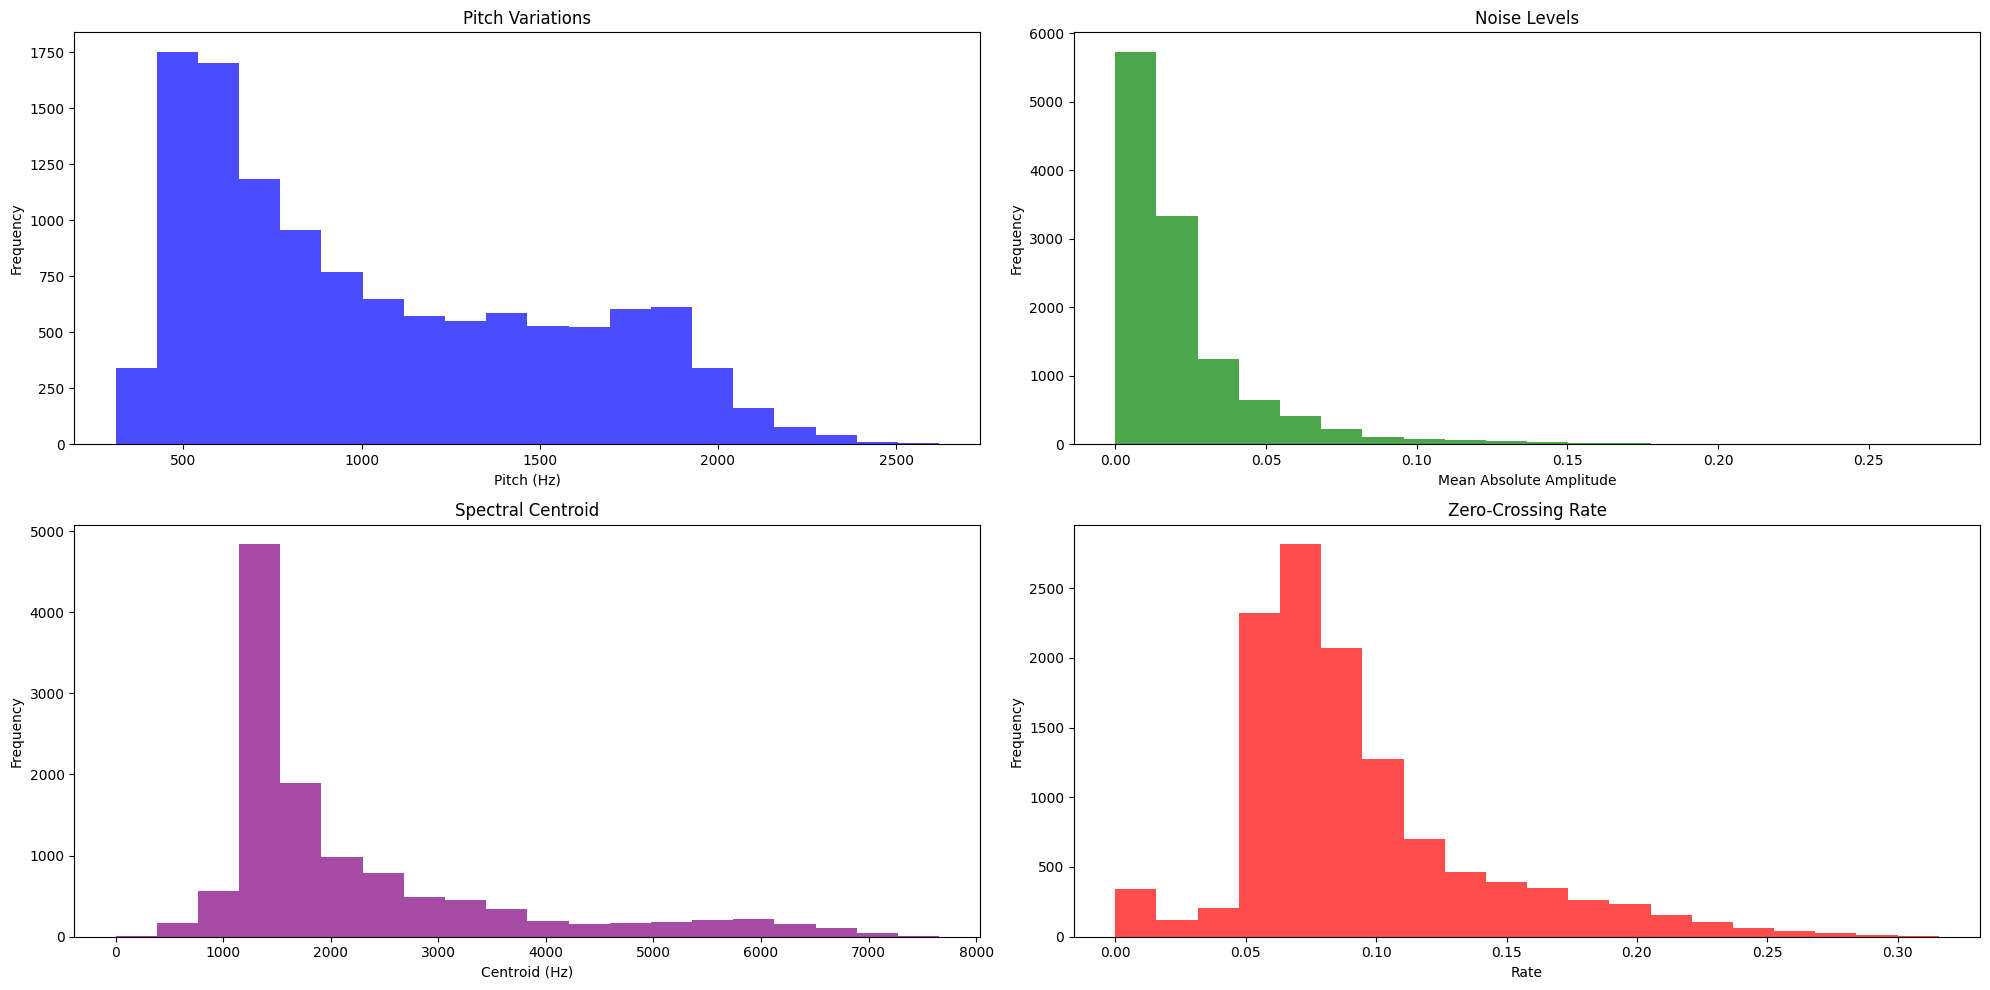

MFCC Means (first 5 samples):
Sample 1: [-306.0274       92.670235      8.491311     23.965403      7.4779925
   -5.7594557   -11.883088     -9.676736     -3.996747    -13.352565
    0.40819734   -9.709486     -6.1271243 ]
Sample 2: [-346.39963     95.83912     10.516282    31.619215    15.872088
   -6.845447    -6.629935    -4.9787273   -5.3106537  -10.283518
   -2.5343664   -7.2553897   -6.1539063]
Sample 3: [-321.42026     94.76091      8.155397    23.323242    11.719156
   -7.116331    -8.534803    -4.9969654   -4.9943995  -13.70651
   -3.3574133   -8.454173    -6.5619407]
Sample 4: [-3.0330374e+02  9.2528893e+01  4.2312312e+00  2.7970133e+01
  1.0869824e+01 -1.1878345e+01 -1.0095112e+01 -7.1497307e+00
 -7.6517596e+00 -1.7085901e+01 -2.0102486e-01 -8.8673239e+00
 -9.3577662e+00]
Sample 5: [-335.4959     100.39331      9.384935    30.160906    11.466775
   -3.3336697   -8.350987    -9.757346    -6.0793266  -12.109531
    1.5376804   -9.795646    -3.4720602]


In [ ]:
# Evaluate dataset diversity
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Analyze pitch variations
def analyze_pitch(audio_files):
    pitches = []
    for file in audio_files:
        y, sr = librosa.load(file, sr=None)
        pitch, _ = librosa.piptrack(y=y, sr=sr)
        pitches.append(np.mean(pitch[pitch > 0]))
    return pitches

# Analyze noise levels
def analyze_noise(audio_files):
    noise_levels = []
    for file in audio_files:
        y, _ = librosa.load(file, sr=None)
        noise_levels.append(np.mean(np.abs(y)))
    return noise_levels

# Analyze spectral centroid
def analyze_spectral_centroid(audio_files):
    spectral_centroids = []
    for file in audio_files:
        y, sr = librosa.load(file, sr=None)
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_centroids.append(np.mean(centroid))
    return spectral_centroids

# Analyze zero-crossing rate
def analyze_zero_crossing_rate(audio_files):
    zero_crossings = []
    for file in audio_files:
        y, _ = librosa.load(file, sr=None)
        zcr = librosa.feature.zero_crossing_rate(y)
        zero_crossings.append(np.mean(zcr))
    return zero_crossings

# Analyze MFCCs
def analyze_mfcc(audio_files):
    mfcc_means = []
    for file in audio_files:
        y, sr = librosa.load(file, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_means.append(np.mean(mfcc, axis=1))
    return mfcc_means

# Collect audio file paths
audio_files = ds_work.paths

# Perform analyses
pitch_variations = analyze_pitch(audio_files)
noise_levels = analyze_noise(audio_files)
spectral_centroids = analyze_spectral_centroid(audio_files)
zero_crossings = analyze_zero_crossing_rate(audio_files)
mfcc_means = analyze_mfcc(audio_files)

# Visualize results
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.hist(pitch_variations, bins=20, color='blue', alpha=0.7)
plt.title('Pitch Variations')
plt.xlabel('Pitch (Hz)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(noise_levels, bins=20, color='green', alpha=0.7)
plt.title('Noise Levels')
plt.xlabel('Mean Absolute Amplitude')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(spectral_centroids, bins=20, color='purple', alpha=0.7)
plt.title('Spectral Centroid')
plt.xlabel('Centroid (Hz)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(zero_crossings, bins=20, color='red', alpha=0.7)
plt.title('Zero-Crossing Rate')
plt.xlabel('Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print MFCC means for inspection
print("MFCC Means (first 5 samples):")
for i, mfcc in enumerate(mfcc_means[:5]):
    print(f"Sample {i+1}: {mfcc}")